# **TASK 2: Stock market prediction-and-forecasting using stacked LSTM**
## LetsGrowMore Virtual Internship Program May 2022

### Data Science Intern - Amna Naseem



In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.datasets import load_boston
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [3]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"

dset = pd.read_csv(url)
dset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
dset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
dset.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [6]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


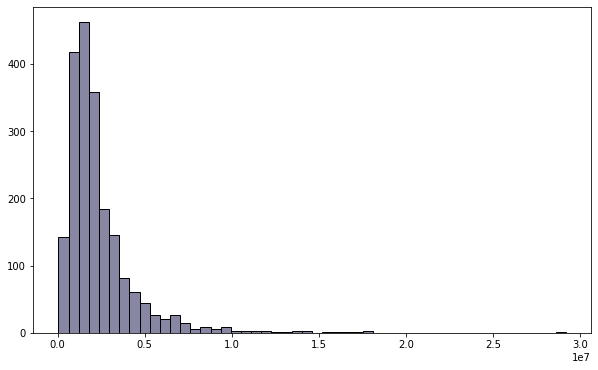

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(dset['Total Trade Quantity'],bins=50, ec='black', color='#8786a3')
plt.show()

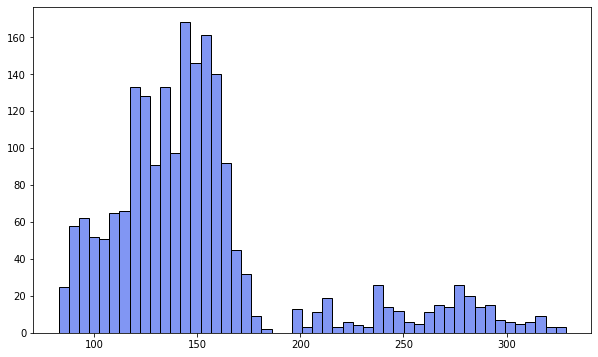

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(dset['High'],bins=50, ec='black', color='#8196f3')
plt.show()

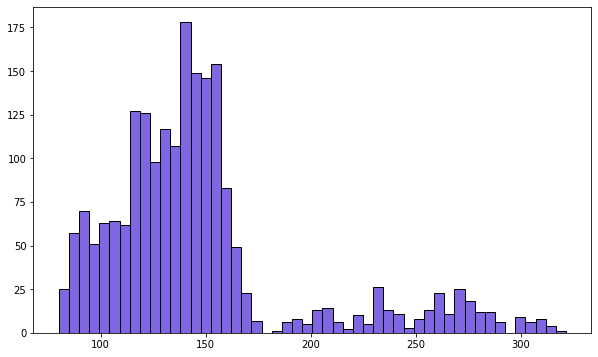

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(dset['Low'],bins=50, ec='black', color='#8166e3')
plt.show()

<Figure size 1296x432 with 0 Axes>

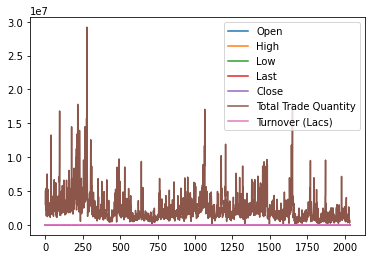

In [10]:
plt.figure(figsize=(18, 6))
dset.plot()

In [66]:
dataset1=dset.reset_index()['Close']


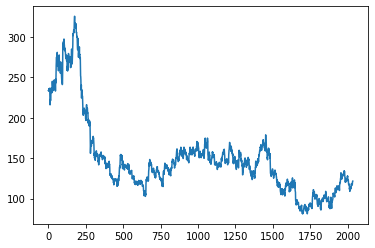

In [67]:
 dataset1.plot()

In [68]:
dataset1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [69]:
dataset1.shape

(2035,)

In [70]:
scale=MinMaxScaler(feature_range=(0,1))
dset1=scale.fit_transform(np.array(dataset1).reshape(-1,1))

In [71]:
trainset_size=int(len(dataset1)*0.70)
test_size=len(dataset1)-trainset_size
train_data,test_data=dset1[0:trainset_size,:],dset1[trainset_size:len(dataset1),:1]

In [30]:
trainset_size,test_size

(1424, 611)

In [73]:
def dataset_creation(data,step_size=1):
    x,y = [],[]

    
    for i in range(len(data)-step_size-1): 
        x.append(data[i:(i+step_size), 0])
        y.append(data[i + step_size, 0])
        return np.array(x), np.array(y)


In [74]:
step =100
x_train, y_train = dataset_creation(train_data, step)
x_test, y_test = dataset_creation(test_data, step)


In [75]:
x_train,y_train

(array([[0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
         0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
         0.57883987, 0.55167484, 0.57618464, 0.58006536, 0.57230392,
         0.57781863, 0.58312908, 0.63623366, 0.62642974, 0.63337418,
         0.62745098, 0.62254902, 0.6376634 , 0.61294935, 0.63112745,
         0.65196078, 0.67075163, 0.66196895, 0.64705882, 0.63970588,
         0.62745098, 0.62336601, 0.63868464, 0.63480392, 0.63991013,
         0.64767157, 0.62785948, 0.63112745, 0.63194444, 0.67790033,
         0.65870098, 0.65890523, 0.64603758, 0.63705065, 0.67544935,
         0.66319444, 0.6439951 , 0.62152778, 0.64419935, 0.68198529,
         0.6629902 , 0.72691993, 0.75265523, 0.77144608, 0.79166667,
         0.79370915, 0.75714869, 0.77736928, 0.80208333, 0.81719771,
         0.7495915 , 0.76960784, 0.74754902, 0.75428922, 0.76143791,
         0.74979575, 0.73999183, 0.72406046, 0.73488562, 0.76021242,
         0.79411765, 0.78104575, 0

In [76]:
x_test,y_test

(array([[0.32148693, 0.32352941, 0.3255719 , 0.32638889, 0.33496732,
         0.34395425, 0.3441585 , 0.34599673, 0.35866013, 0.35580065,
         0.37214052, 0.36294935, 0.3754085 , 0.36315359, 0.34640523,
         0.34579248, 0.34844771, 0.35784314, 0.34722222, 0.33353758,
         0.33537582, 0.33680556, 0.33680556, 0.32271242, 0.32638889,
         0.3188317 , 0.33986928, 0.37765523, 0.3999183 , 0.36968954,
         0.35886438, 0.35927288, 0.35294118, 0.32107843, 0.31413399,
         0.31740196, 0.31597222, 0.32209967, 0.28267974, 0.28492647,
         0.27389706, 0.28778595, 0.30187908, 0.31045752, 0.32128268,
         0.31454248, 0.33129085, 0.33292484, 0.32802288, 0.32291667,
         0.32802288, 0.32312092, 0.30718954, 0.29595588, 0.30473856,
         0.28288399, 0.28982843, 0.30412582, 0.26429739, 0.25285948,
         0.20710784, 0.20261438, 0.19566993, 0.19546569, 0.20465686,
         0.18974673, 0.19934641, 0.1942402 , 0.21527778, 0.21629902,
         0.2183415 , 0.21997549, 0

In [77]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)
x_train.shape,x_test.shape

((1, 100, 1), (1, 100, 1))

In [78]:
modl=Sequential()
modl.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
modl.add(LSTM(50,return_sequences=True))
modl.add(LSTM(50))
modl.add(Dense(1))
modl.compile(loss='mean_squared_error',optimizer='adam')

In [79]:
modl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [80]:
modl.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=80,batch_size=64,verbose=1)

Epoch 1/80
1/1 [==============================] - 7s 7s/step - loss: 0.7795 - val_loss: 0.0245
Epoch 2/80
1/1 [==============================] - 0s 126ms/step - loss: 0.6385 - val_loss: 0.0130
Epoch 3/80
1/1 [==============================] - 0s 128ms/step - loss: 0.4953 - val_loss: 0.0038
Epoch 4/80
1/1 [==============================] - 0s 142ms/step - loss: 0.3450 - val_loss: 2.6974e-05
Epoch 5/80
1/1 [==============================] - 0s 143ms/step - loss: 0.1930 - val_loss: 0.0090
Epoch 6/80
1/1 [==============================] - 0s 149ms/step - loss: 0.0617 - val_loss: 0.0467
Epoch 7/80
1/1 [==============================] - 0s 127ms/step - loss: 6.9014e-05 - val_loss: 0.1293
Epoch 8/80
1/1 [==============================] - 0s 130ms/step - loss: 0.0586 - val_loss: 0.1927
Epoch 9/80
1/1 [==============================] - 0s 130ms/step - loss: 0.1181 - val_loss: 0.1967
Epoch 10/80
1/1 [==============================] - 0s 126ms/step - loss: 0.1048 - val_loss: 0.1648
Epoch 11/80
1/

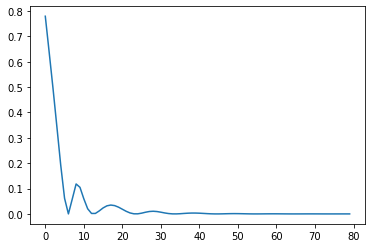

In [81]:
history=modl.history.history['loss']
plt.plot(history)
plt.show()

In [82]:
predict_train=modl.predict(x_train)
predict_test= modl.predict(x_test)

In [83]:
math.sqrt(mean_squared_error(y_train,predict_train))

0.006543358556585277

In [84]:
math.sqrt(mean_squared_error(y_train,predict_train))

0.006543358556585277

In [85]:
predict_train = scale.inverse_transform(predict_train)
predict_test = scale.inverse_transform(predict_test)

In [86]:
step = 100
train_val = np.empty_like(dset1)
train_val[:,:] = np.nan
train_val[step:len(predict_train)+step, :] = predict_train

test_val = np.empty_like(dset1)
test_val[:,:] = np.nan
test_val[len(predict_train) + (step * 2)+1:len(dset1)-1, :] = predict_test

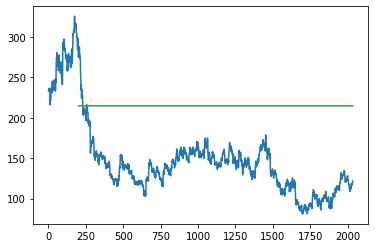

In [88]:
plt.plot(scale.inverse_transform(dset1))
plt.plot(predict_train)
plt.plot(test_val)
# plt.show()